In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
!python -m venv sklearn-venv
!sklearn-venv\Scripts\activate
!pip install -U scikit-learn
!python -m pip show scikit-learn

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt-get install python3-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: ['/content/sklearn-venv/bin/python3', '-Im', 'ensurepip', '--upgrade', '--default-pip']

/bin/bash: sklearn-venvScriptsactivate: command not found
     |████████████████████████████████| 6.9MB 7.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
Name: scikit-learn
Version: 0.23.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, threadpoolctl, scip

## Importing dataset

In [0]:
data = pd.read_csv('churn_prediction_simple.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
customer_id                       22067 non-null int64
vintage                           22067 non-null int64
age                               22067 non-null int64
gender                            22067 non-null int64
dependents                        22067 non-null float64
occupation                        22067 non-null int64
city                              22067 non-null float64
customer_nw_category              22067 non-null int64
branch_code                       22067 non-null int64
days_since_last_transaction       22067 non-null float64
current_balance                   22067 non-null float64
previous_month_end_balance        22067 non-null float64
average_monthly_balance_prevQ     22067 non-null float64
average_monthly_balance_prevQ2    22067 non-null float64
current_month_credit              22067 non-null float64
previous_month_credit             22067 non-null f

In [0]:
#separating dependent and independent varibales
X = data.drop(columns = ['churn','customer_id'])
Y = data['churn']

In [0]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [0]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify = Y, random_state = 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

## Model Building, Bagging Logistic Regression

In [0]:
from sklearn.ensemble import BaggingClassifier as BC
classifier = BC()
classifier.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [0]:
from sklearn.linear_model import LogisticRegression as LR

classifier = BC(base_estimator = LR(),
                n_estimators = 150,
                n_jobs = -1,
                random_state = 42)
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     14234
           1       0.75      0.08      0.15      3419

    accuracy                           0.82     17653
   macro avg       0.78      0.54      0.52     17653
weighted avg       0.80      0.82      0.75     17653



In [0]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3559
           1       0.78      0.09      0.16       855

    accuracy                           0.82      4414
   macro avg       0.80      0.54      0.53      4414
weighted avg       0.81      0.82      0.76      4414



# Model Building, Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predicted_values = classifier.predict(x_train)
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [0]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3559
           1       0.72      0.45      0.55       855

    accuracy                           0.86      4414
   macro avg       0.80      0.70      0.73      4414
weighted avg       0.85      0.86      0.85      4414



In [0]:
#from sklearn.metrics import classification_report
#print(classification_report(y_train, predicted_values))

In [0]:
#predicted_values = classifier.predict(x_test)
#print(classification_report(y_test, predicted_values))

## Model Building, predictions

In [0]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()

In [0]:
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##Evaluation Metrics

# Hyperparamter Tuning

In [0]:
classifier = RFC()
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## n_estimators

In [0]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):

  model.fit(x1,y1)

  predict = model.predict(x1)
  f1 = f1_score(y1, predict)

  predict = model.predict(x2)
  f2 = f1_score(y2, predict)

  return f1, f2

In [0]:
def effect(train_score, test_score, x_axis, title):
  plt.figure(figsize = (7,4), dpi = 120)
  plt.plot(x_axis, train_score, color = 'red', label = 'train_Score')
  plt.plot(x_axis, test_score, color = 'blue', label = 'test_Score')
  plt.title(title)
  plt.legend()
  plt.xlabel("parameter_value")
  plt.ylabel("f1 score")
  plt.show()

In [0]:
estimators = [i for i in range(1,600,10)]
train = []
test = []

for i in estimators:  
  model = RFC(class_weight = 'balanced_subsample',
              n_estimators = i,
              n_jobs = -1,
              max_depth = 7,
              random_state = 101)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

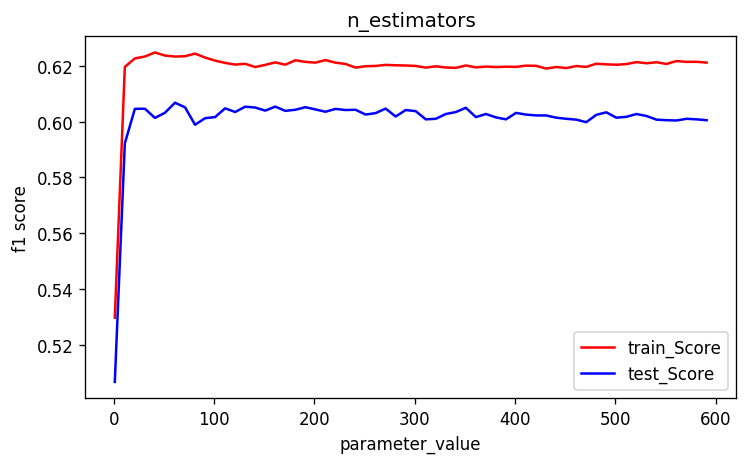

In [0]:
effect( train, test, range(1,600,10) , 'n_estimators')

## max_samples

In [0]:
maxsamples = [i/1000 for i in range(1,1000)]
train = []
test = []

for i in maxsamples:  
  model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,
              n_jobs = -1, max_depth = 7, random_state = 101, max_samples = i)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

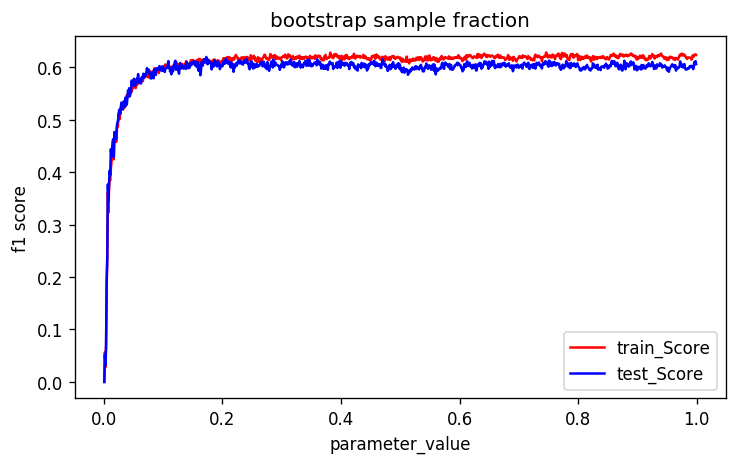

In [0]:
effect( train, test, maxsamples , 'bootstrap sample fraction')

In [0]:
maxfeatures = range(1,X.shape[1])
train = []
test = []

for i in maxfeatures:  
  model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,
              n_jobs = -1, max_depth = 7, random_state = 101, max_features = i)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

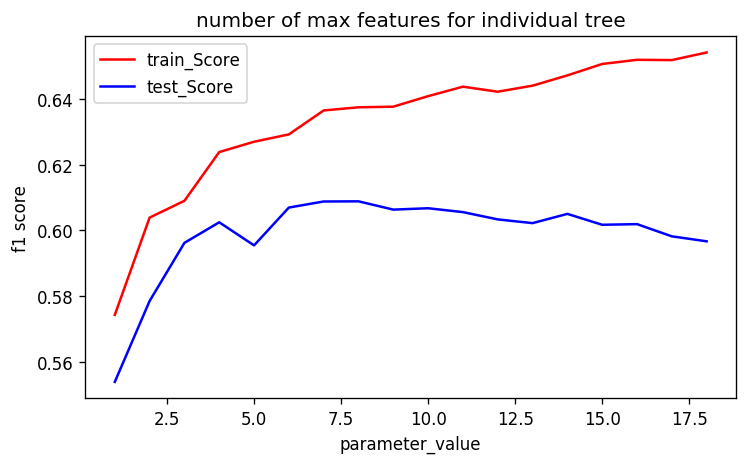

In [0]:
effect( train, test, maxfeatures , 'number of max features for individual tree')